In [1]:
import numpy as np
import pandas as pd
import pickle
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score

In [2]:
dt = pd.read_csv('diabetes.csv') 
dt.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
dt.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [4]:
dt.shape

(768, 9)

In [5]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
dt.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
dt.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
D:\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf

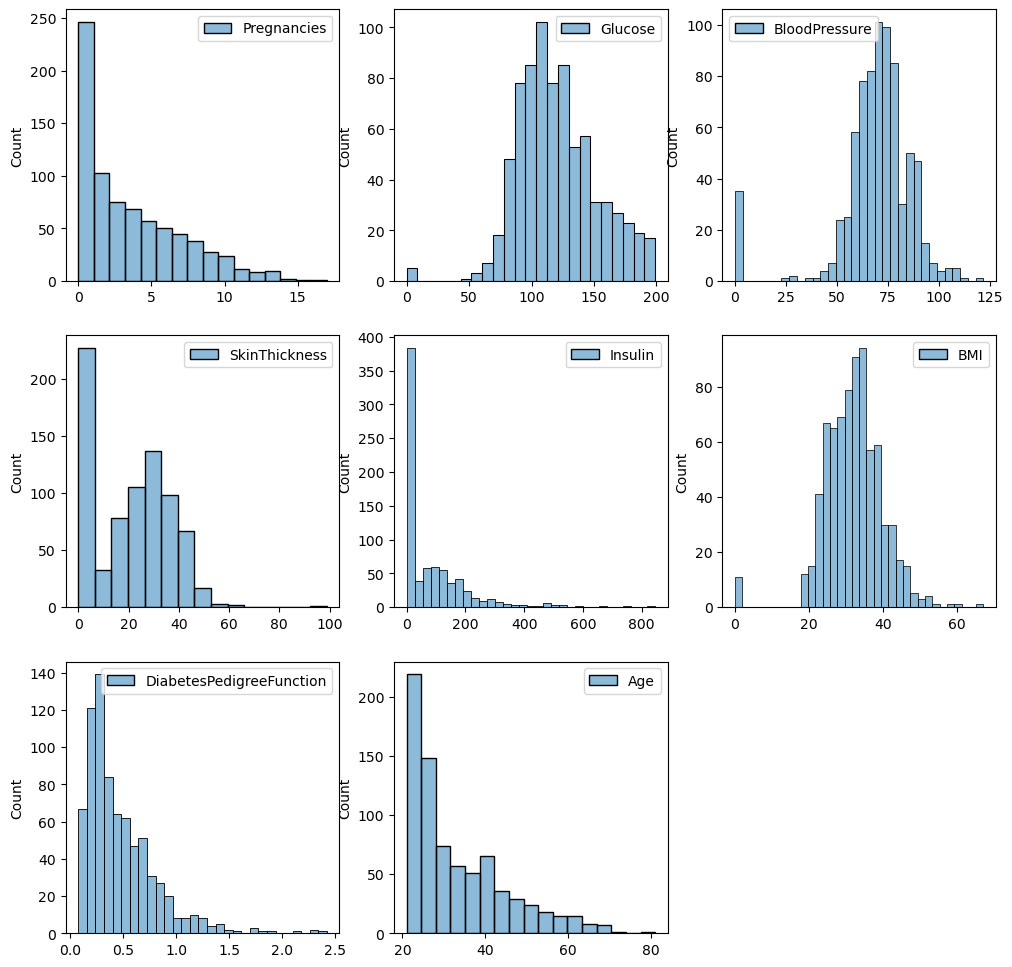

In [8]:
plt.figure(figsize=(12,12))
i=1
for col in dt.iloc[:,:-1]:
    plt.subplot(3,3,i)
    sns.histplot(dt[[col]])
    i+=1

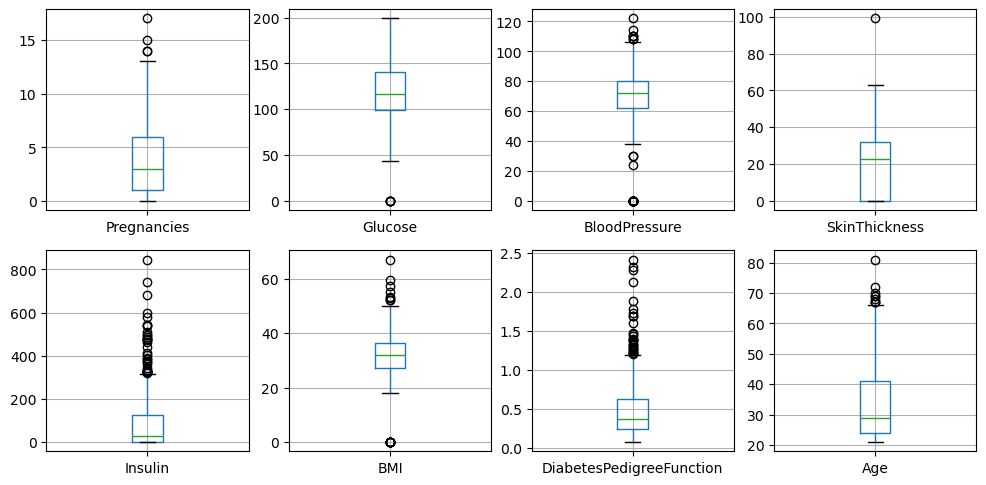

In [9]:
plt.figure(figsize=(12,12))
i=1
for col in dt.iloc[:,:-1]:
    plt.subplot(4,4,i)
    dt[[col]].boxplot()
    i+=1

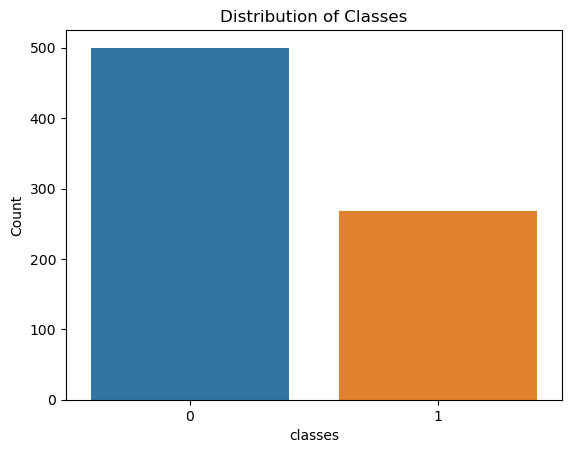

In [10]:
sns.countplot(data=dt, x='Outcome')
plt.xlabel('classes')
plt.ylabel('Count')
plt.title('Distribution of Classes')
plt.show()

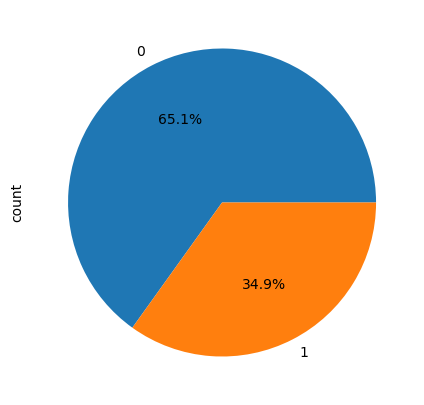

In [11]:
plt.figure(figsize=(5,5))
dt['Outcome'].value_counts().plot(kind='pie',autopct="%.1f%%")
plt.show()

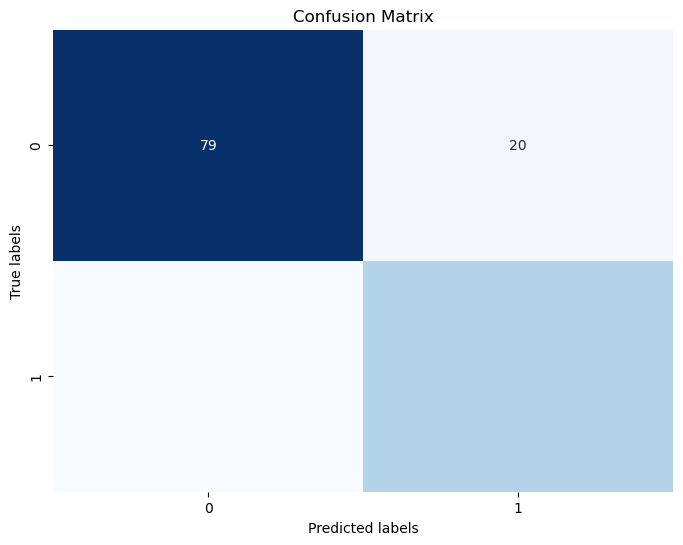

In [12]:
import numpy as np
import pandas as pd
import pickle
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# Load data
dt = pd.read_csv('diabetes.csv') 

# Define features and target
X = dt.drop('Outcome', axis=1)
y = dt['Outcome']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


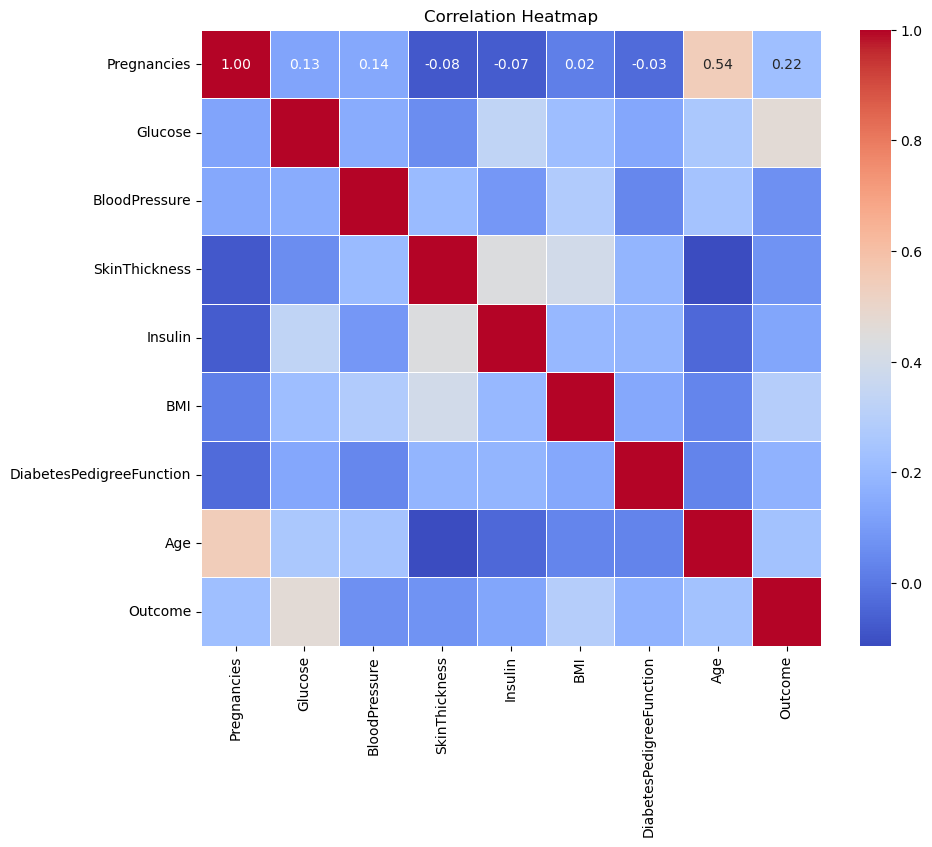

In [13]:
plt.figure(figsize=(10, 8))
correlation_matrix = dt.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [14]:
x= dt.drop(columns = 'Outcome', axis=1)

In [15]:
y= dt['Outcome']

In [16]:
scaler = StandardScaler()
scaler.fit(x)
standardized_data = scaler.transform(x)
x= standardized_data


In [17]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, stratify=y, random_state=2)

In [18]:
classifier = svm.SVC(kernel='linear')
classifier.fit(x_train, y_train)

SVC(kernel='linear')

In [19]:
x_train_prediction = classifier.predict(x_train)
training_data_accuracy = accuracy_score(x_train_prediction, y_train)
training_data_accuracy

0.7866449511400652

In [20]:
X_test_prediction = classifier.predict(x_test)
test_data_accuracy = accuracy_score(X_test_prediction, y_test)

In [21]:
m=LogisticRegression()
m.fit(x_train,y_train)

LogisticRegression()

In [22]:
#model Evaluation
x_test_pred=m.predict(x_test)
test_acc=accuracy_score(x_test_pred,y_test)
test_acc

0.7597402597402597

In [23]:
d=DecisionTreeClassifier()
d.fit(x_train,y_train)

DecisionTreeClassifier()

In [24]:
x_test_pred=d.predict(x_test)
test_acc=accuracy_score(x_test_pred,y_test)
test_acc

0.7012987012987013

In [25]:
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [26]:
x_test_pred=rfc.predict(x_test)
test_acc=accuracy_score(x_test_pred,y_test)
test_acc

0.7207792207792207

In [27]:
kNN= KNeighborsClassifier()
kNN.fit(x_train,y_train)

KNeighborsClassifier()

In [28]:
x_test_pred=kNN.predict(x_test)
test_acc=accuracy_score(x_test_pred,y_test)
test_acc

0.7207792207792207

In [29]:
x= dt.drop(columns = 'Outcome', axis=1)

In [30]:
features_data = {'columns':list(x.columns)}
features_data

{'columns': ['Pregnancies',
  'Glucose',
  'BloodPressure',
  'SkinThickness',
  'Insulin',
  'BMI',
  'DiabetesPedigreeFunction',
  'Age']}

In [31]:
dt.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [32]:
test_series = pd.Series(np.zeros(len(features_data['columns'])),index=features_data['columns'])

In [33]:
test_series['Pregnancies'] = 1
test_series['Glucose'] = 89
test_series['BloodPressure'] = 66
test_series['SkinThickness'] = 23
test_series['Insulin'] =94
test_series['BMI'] = 28.1
test_series['DiabetesPedigreeFunction'] = 0.167
test_series['Age']=21

test_series

Pregnancies                  1.000
Glucose                     89.000
BloodPressure               66.000
SkinThickness               23.000
Insulin                     94.000
BMI                         28.100
DiabetesPedigreeFunction     0.167
Age                         21.000
dtype: float64

In [34]:
class_labels={0:"no diabetis",1:"diabetis"}

In [35]:
output = classifier.predict([test_series])[0]
print("The person has",class_labels[output])

The person has diabetis


In [36]:
output = classifier.predict([test_series])[0]
print("The person has",class_labels[output])

The person has diabetis
